/tmp/ipykernel_2560/2213508363.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trajectory_data = pd.concat([trajectory_data,newrow], ignore_index=True)


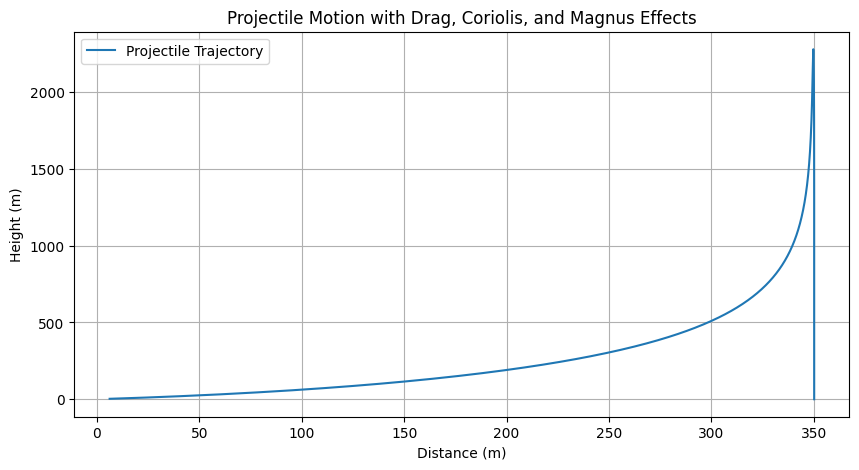

In [7]:
# next try

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
omega = 7.2921159e-5  # Earth's angular velocity (rad/s)

# Inputs
V0 = 682 #float(input("Enter the initial velocity (m/s): "))
Theta = math.radians(20.77) #float(input("Enter the angle of elevation (degrees): ")))
rho = 1.225 #float(input("Enter the air density at altitude (kg/m^3): "))
Cd = .343 #float(input("Enter the drag coefficient: "))
A = .01887 #float(input("Enter the projectile cross-sectional area (m^2): "))
spin_rate = V0/(20*.155) #float(input("Enter the projectile spin rate (revolutions per second): "))

# Initial conditions
Vx = V0 * math.cos(Theta)
Vy = V0 * math.sin(Theta)
x = 0
y = 0

# Time step
dt = 0.01
time = 0

# DataFrame to store trajectory data
trajectory_data = pd.DataFrame(columns=['Time', 'X', 'Y', 'Velocity', 'Angle_of_Flight'])

# Simulation loop
while y >= 0:
    # Drag force
    Fd = 0.5 * rho * (Vx**2 + Vy**2) * Cd * A
    # Drag acceleration
    ax_drag = -Fd * Vx / math.sqrt(Vx**2 + Vy**2)
    ay_drag = -Fd * Vy / math.sqrt(Vx**2 + Vy**2)
    
    # Coriolis force
    F_cor = 2 * omega * Vy * math.sin(math.radians(Theta))
    ax_cor = F_cor / (V0 * math.cos(Theta))
    
    # Magnus effect
    Cl = 0.2  # lift coefficient, assumed constant for simplicity
    F_mag = Cl * spin_rate * (Vx**2 + Vy**2) * A
    ay_mag = F_mag / (V0 * math.sin(Theta))
    
    # Update velocities and positions
    Vx += (ax_drag + ax_cor) * dt
    Vy += (ay_drag + ay_mag - g) * dt
    x += Vx * dt
    y += Vy * dt
    time += dt
    
    # Calculate velocity and angle of flight
    velocity = math.sqrt(Vx**2 + Vy**2)
    angle_of_flight = math.degrees(math.atan2(Vy, Vx))
    
    # Append data to the DataFrame
    newrow = pd.DataFrame({'Time': time, 'X': x, 'Y': y, 'Velocity': velocity, 'Angle_of_Flight': angle_of_flight}, index=[0])
    trajectory_data = pd.concat([trajectory_data,newrow], ignore_index=True)

    # Break the loop if the projectile hits the ground
    if y < 0:
        break

# Plot the trajectory
plt.figure(figsize=(10, 5))
plt.plot(trajectory_data['X'], trajectory_data['Y'], label='Projectile Trajectory')
plt.title('Projectile Motion with Drag, Coriolis, and Magnus Effects')
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.legend()
plt.grid(True)
plt.show()
